# Operations on distribution functions
In this example, we demonstrate various operations on [distribution](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#DistributionType) functions using the probabilistic library.

### Define a stochastic variable
First, we import the necessary classes:

In [1]:
from probabilistic_library import DistributionType, Stochast, StandardNormal

Next, we create a random variable using the [Stochast](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast) class:

In [2]:
stochast = Stochast()

Let's consider a random variable, which is uniformly distributed over the interval $[-1, 1]$. This is defined as follows:

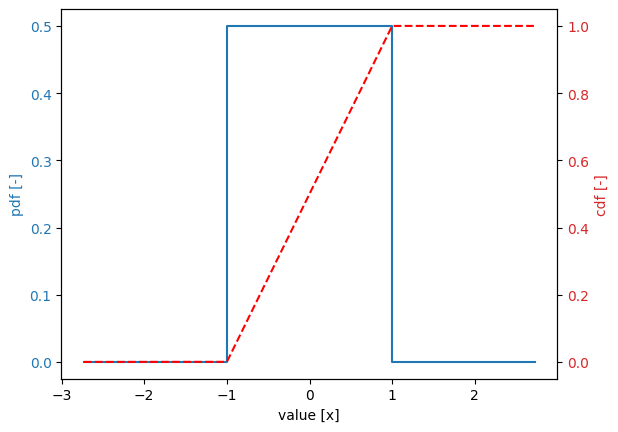

In [3]:
stochast.distribution = DistributionType.uniform
stochast.minimum = -1
stochast.maximum = 1

stochast.plot()

The properties of this distribution are the [minimum](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.minimum) and [maximum](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.maximum) values, but also the derived properties as [mean](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.mean), [deviation](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.deviation) and coefficient of variation ([variation](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.variation)):

In [4]:
stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = -1.0
  maximum = 1.0
Derived values:
  mean = 0.0
  deviation = 0.5773502691896257
  variation = 0.0


We can also specify the derived properties leading to an update of the other parameters:

In [5]:
stochast.mean = 2.0
stochast.deviation = 1.0

stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = 0.2679491924311228
  maximum = 3.732050807568877
Derived values:
  mean = 2.0
  deviation = 0.9999999999999999
  variation = 0.49999999999999994


In [6]:
stochast.mean = 2.0
stochast.variation = 1.0

stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = -1.4641016151377544
  maximum = 5.464101615137754
Derived values:
  mean = 2.0
  deviation = 1.9999999999999998
  variation = 0.9999999999999999


### CDF and PDF

The cdf and pdf values of a distribution function can be obtained with [stochast.get_cdf()](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.get_cdf) and [stochast.get_pdf()](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.get_pdf), respectively:

In [7]:
print(f"CDF: {stochast.get_cdf(2.0)}")
print(f"PDF: {stochast.get_pdf(2.0)}")

CDF: 0.5
PDF: 0.14433756729740646


### Quantiles

A quantile can be calculated with [stochast.get_quantile()](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.get_quantile), for example:

In [8]:
p = 0.75
print(f"x({p}) {stochast.get_quantile(p)}")

x(0.75) 3.7320508075688776


Another option is to use the function [StandardNormal.get_u_from_p()](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#StandardNormal.get_u_from_p) in the class [StandardNormal](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#StandardNormal), which converts the non-exceeding probability of 0.75 into the corresponding value in the standard normal space ($u$-space). Subsequently, [stochast.get_x_from_u()](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.get_x_from_u) translates it back to the original space ($x$-space).

In [9]:
u = StandardNormal.get_u_from_p(p)
print(f"x({p}) = {stochast.get_x_from_u(u)}")

x(0.75) = 3.7320508075688776


### Design value

A [design_value](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.design_value) of a variable is defined as the value obtained by dividing the value corresponding to a specific [design_quantile](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.design_quantile) by the [design_factor](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.design_factor). For example:

In [10]:
stochast.design_quantile = 0.75
stochast.design_factor = 0.99

stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = -1.4641016151377544
  maximum = 5.464101615137754
  design_quantile = 0.75
  design_factor = 0.99
Derived values:
  mean = 2.0
  deviation = 1.9999999999999998
  variation = 0.9999999999999999
  design_value = 3.769748290473614


The [design_value](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.design_value) can be set explicitely, leading to an update of the properties of the random variable (while [design_quantile](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.design_quantile), [design_factor](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.design_factor) and [variation](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.variation) remain unchanged):

In [11]:
stochast.design_value = 3.5

stochast.print()

Variable:
  distribution = uniform
Definition:
  minimum = -1.3593370081945169
  maximum = 5.07311477919061
  design_quantile = 0.75
  design_factor = 0.99
Derived values:
  mean = 1.8568888854980465
  deviation = 1.856888885498046
  variation = 0.9999999999999998
  design_value = 3.500001850852857


### Truncated distribution function
Let's consider a normal distribution function with a [location](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.location) of 0.0 and a [scale](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.scale) of 1.0:

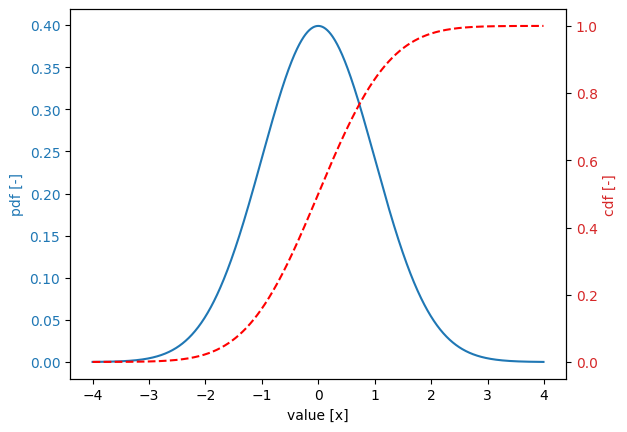

In [12]:
stochast = Stochast()
stochast.distribution = DistributionType.normal
stochast.location = 0.0
stochast.scale = 1.0
stochast.plot()

To truncate a distribution, we use the [truncated](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.truncated) attribute.

In [13]:
stochast.truncated = True

The truncation interval is specified using the [minimum](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.minimum) and [maximum](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.maximum) properties. If these are not defined, the original domain of the distribution is used (i.e., no truncation is applied).

Suppose we want to truncate this distribution to the interval [-0.5, \infty). If this is the first time truncation is applied in the project, it is sufficient to specify only the [minimum](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.minimum) value:

Variable:
  distribution = normal (truncated)
Definition:
  location = 0.0
  scale = 1.0
  minimum = -0.5
  maximum = inf
Derived values:
  mean = 0.0
  deviation = 1.0
  variation = 0.0


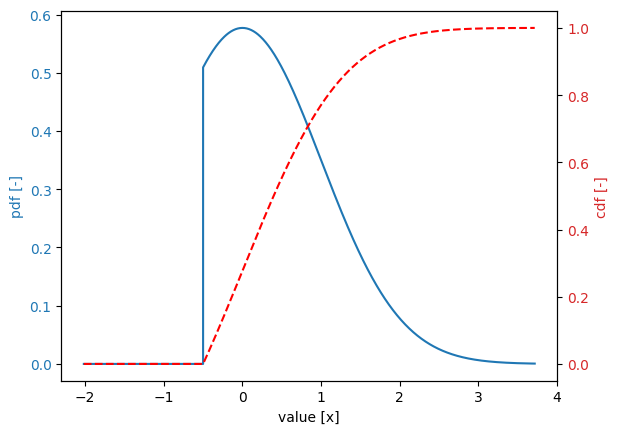

In [14]:
stochast.minimum = -0.5

stochast.print()
stochast.plot()

If we want to truncate the same distribution to the interval $(-\infty, 0.5]$, we need to specify both the [minimum](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.minimum) and [maximum](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.maximum) properties. Otherwise, the minimum would remain set to -0.5.

Variable:
  distribution = normal (truncated)
Definition:
  location = 0.0
  scale = 1.0
  minimum = -inf
  maximum = 0.5
Derived values:
  mean = 0.0
  deviation = 1.0
  variation = 0.0


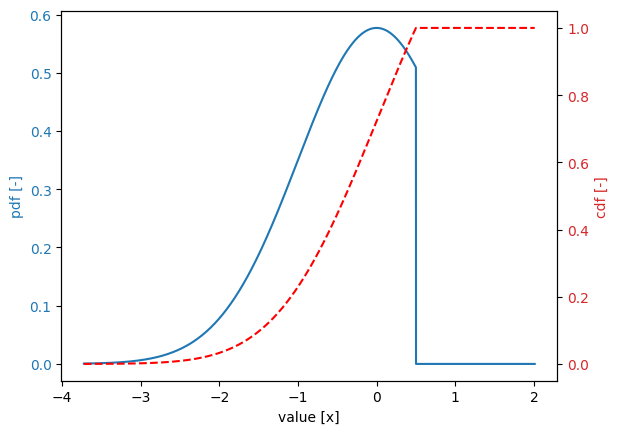

In [15]:
import numpy as np
stochast.truncated = True
stochast.minimum = -np.inf
stochast.maximum = 0.5

stochast.print()
stochast.plot()

Below, we truncate the distribution to the interval $[-0.5, 0.5]$:

Variable:
  distribution = normal (truncated)
Definition:
  location = 0.0
  scale = 1.0
  minimum = -0.5
  maximum = 0.5
Derived values:
  mean = 0.0
  deviation = 1.0
  variation = 0.0


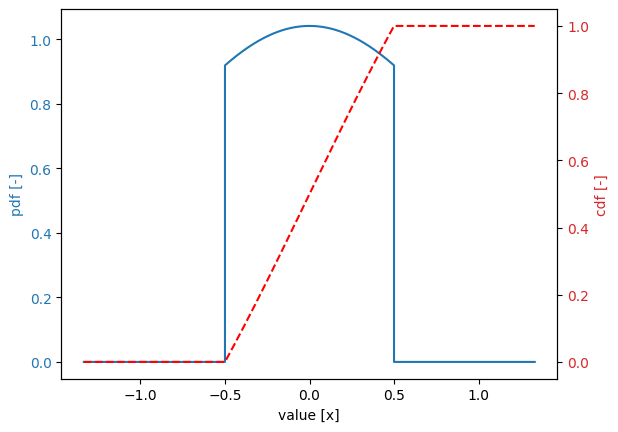

In [16]:
stochast.truncated = True
stochast.minimum = -0.5
stochast.maximum = 0.5

stochast.print()
stochast.plot()

### Inverted distribution function

Let's consider a log-normal distribution function with a [location](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.location)of 1.0, a [scale](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.scale) of 0.5 and a [shift](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.shift) of 0.0:

Variable:
  distribution = log_normal
Definition:
  location = 1.0
  scale = 0.5
  shift = 0.0
Derived values:
  mean = 3.080216848918031
  deviation = 1.6415718456238662
  variation = 0.5329403500277882


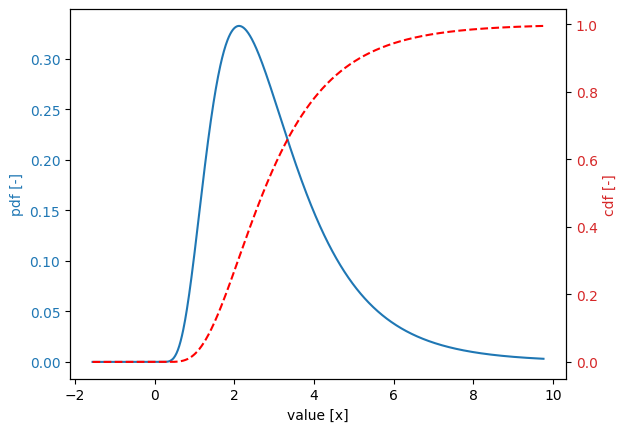

In [17]:
stochast = Stochast()
stochast.distribution = DistributionType.log_normal
stochast.location = 1.0
stochast.scale = 0.5
stochast.shift = 0.0

stochast.print()
stochast.plot()

We want to invert this distribution function with respect to the [shift](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.shift) value. This is done by setting the [inverted](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.inverted) attribute:

Variable:
  distribution = log_normal (inverted)
Definition:
  location = 1.0
  scale = 0.5
  shift = 0.0
Derived values:
  mean = -3.080216848918031
  deviation = 1.6415718456238662
  variation = 0.5329403500277882


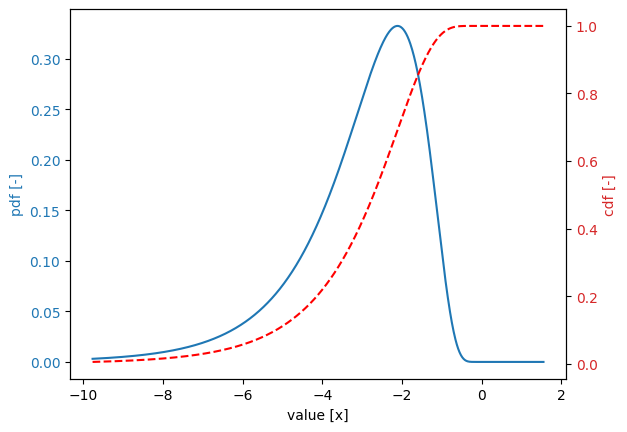

In [18]:
stochast.inverted = True

stochast.print()
stochast.plot()

### Fit parameters of a distribution function
It is also possible to estimate parameters of a distribution function from data. In this example, we consider the following dataset:

In [19]:
data = [2.3, 0.0, -1.0, 2.6, 2.7, 2.8, 3.3, 3.4, 1.0, 3.0, 0.0, -2.0, -1.0]

Let's consider a normal distribution. By using [stochast.fit()](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.fit), we obtain the fitted [location](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.location) and [scale](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.scale):

Variable:
  distribution = normal
Definition:
  location = 1.3153846153846152
  scale = 1.8959809043720852
Derived values:
  mean = 1.3153846153846152
  deviation = 1.8959809043720852
  variation = 1.4413889916279012


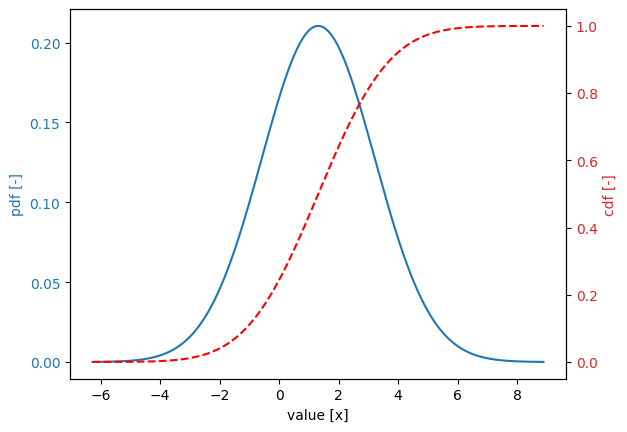

In [20]:
stochast = Stochast()
stochast.distribution = DistributionType.normal
stochast.fit(data)

stochast.print()
stochast.plot()

The goodness of fit can be assessed using the Kolmogorov-Smirnov test through the [get_ks_test()](https://deltares.github.io/ProbabilisticLibrary/probabilistic_library/statistic.html#Stochast.get_ks_test) method:

In [21]:
def get_ks_test(data):
    print(f"kolmogorov smirnov test = {stochast.get_ks_test(data)}")

get_ks_test(data)

kolmogorov smirnov test = 0.23669173779063168


When we consider a log-normal distribution, the fitted parameters are as follows:

Variable:
  distribution = log_normal
Definition:
  location = 1.5964855623845133
  scale = 0.4261942592095209
  shift = -4.0
Derived values:
  mean = 1.4049020870683506
  deviation = 2.412211284018044
  variation = 1.7169960143284249


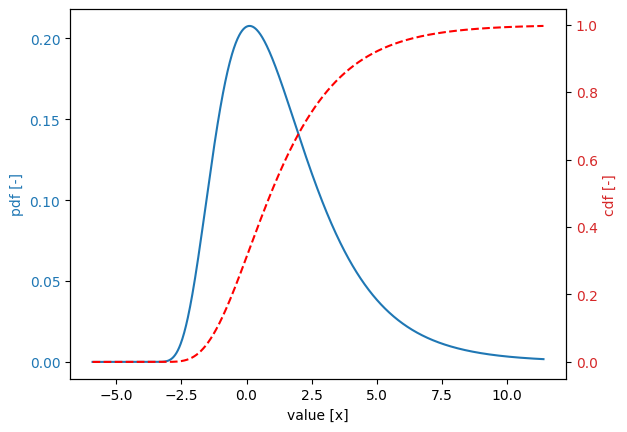

In [22]:
stochast = Stochast()
stochast.distribution = DistributionType.log_normal
stochast.fit(data)

stochast.print()
stochast.plot()

The result of the goodness-of-fit test is:

In [24]:
get_ks_test(data)

kolmogorov smirnov test = 0.2550238105742991
